<a href="https://colab.research.google.com/github/sachinkun21/AV_WNS/blob/master/Finding_Shortest_Path_using_NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Implementing Graph Theory in Python to Solve an Airlines Challenge**
And finally, we get to work with data in Python! In this dataset, we have records of over 7 million flights from the USA. The below variables have been provided:

- Origin and destination
- Scheduled time of arrival and departure
- Actual time of arrival and departure
- Date of the journey
- Distance between the source and destination
- Total airtime of the flight

It is a gigantic dataset and I have taken only a sample from it for this article. The idea is to give you an understanding of the concepts using this sample dataset, and you can then apply them to the entire dataset. Download the dataset which we will be using for the case study from here. We will first import the usual libraries, and read the dataset, which is provided in a .csv format:


#### Loading the Dataset and Libaries

In [1]:
import os

# Mounting Google drive to read Data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
ls /content/drive/'My Drive'/DataScience/

AirLine_data.csv  atis/         Employee.csv     transaction.csv
Assignment.docx   Dataset.xlsx  Employee_HR.csv


In [4]:
# linear algebra
import numpy as np
# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Reading "turnover.csv" file and saving it in a DataFrame
df = pd.read_csv("/content/drive/My Drive/DataScience/AirLine_data.csv")

# printing top 5 rows of DataFrame
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,113.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,76.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,78.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,77.0,IND,BWI,515


Here:
- CRSDepTime, CRSArrTime, DepTime, and ArrTime represent the scheduled time of departure, the scheduled time of arrival, the actual time of departure, and the actual time of arrival respectively.
- Origin and Dest are the Origin and Destination of the journey.

There can often be multiple paths from one airport to another, and the aim is to find the shortest possible path between all the airports. There are two ways in which we can define a path as the shortest:

- By distance
- By air time

We can solve such problems using the concepts of graph theory.

**Can you recall what we need to do to make a graph?**

`The answer is identifying the vertices and edges!`

We can convert the problem to a graph by representing all the airports as vertices, and the route between them as edges. We will be using NetworkX for creating and visualizing graphs. NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. You can refer to the documentation of NetworkX.

After installing NetworkX, we will create the edges and vertices for our graph using the dataset:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
Year          50000 non-null int64
Month         50000 non-null int64
DayofMonth    50000 non-null int64
DayOfWeek     50000 non-null int64
DepTime       49365 non-null float64
CRSDepTime    50000 non-null int64
ArrTime       49293 non-null float64
CRSArrTime    50000 non-null int64
AirTime       49293 non-null float64
Origin        50000 non-null object
Dest          50000 non-null object
Distance      50000 non-null int64
dtypes: float64(3), int64(7), object(2)
memory usage: 4.6+ MB


In [0]:
import networkx as nx

df_net = nx.from_pandas_edgelist(df , source = 'Origin' , target = 'Dest', edge_attr = True)

df_net stores the vertices and edges automatically. Take a quick look at the edges and vertices of the graph which we have created:



In [10]:
df_net.nodes()

NodeView(('IAD', 'TPA', 'IND', 'BWI', 'JAX', 'LAS', 'MCI', 'MCO', 'MDW', 'PHX', 'ISP', 'FLL', 'PBI', 'RSW', 'JAN', 'HOU', 'BHM', 'BNA', 'ORF', 'PHL', 'ABQ', 'ALB', 'AMA', 'AUS', 'BDL', 'BOI', 'BUF', 'BUR', 'CLE', 'CMH', 'DEN', 'ELP', 'GEG', 'LAX', 'LBB', 'LIT', 'MAF', 'MHT', 'MSY', 'OAK', 'OKC', 'OMA', 'ONT', 'PDX', 'PIT', 'PVD', 'RDU', 'RNO', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC', 'SMF', 'SNA', 'STL', 'TUL', 'TUS', 'DAL', 'DTW', 'HRL', 'CRP'))

In [11]:
df_net.edges()

EdgeView([('IAD', 'TPA'), ('IAD', 'LAS'), ('IAD', 'MCO'), ('IAD', 'MDW'), ('TPA', 'IND'), ('TPA', 'ISP'), ('TPA', 'JAX'), ('TPA', 'LAS'), ('TPA', 'MCI'), ('TPA', 'MDW'), ('TPA', 'MHT'), ('TPA', 'MSY'), ('TPA', 'ORF'), ('TPA', 'PBI'), ('TPA', 'PHL'), ('TPA', 'PHX'), ('TPA', 'PIT'), ('TPA', 'PVD'), ('TPA', 'RDU'), ('TPA', 'SAT'), ('TPA', 'SDF'), ('TPA', 'STL'), ('TPA', 'ABQ'), ('TPA', 'ALB'), ('TPA', 'AUS'), ('TPA', 'BDL'), ('TPA', 'BHM'), ('TPA', 'BNA'), ('TPA', 'BUF'), ('TPA', 'BWI'), ('TPA', 'CMH'), ('TPA', 'DEN'), ('TPA', 'FLL'), ('TPA', 'HOU'), ('IND', 'BWI'), ('IND', 'JAX'), ('IND', 'LAS'), ('IND', 'MCI'), ('IND', 'MCO'), ('IND', 'MDW'), ('IND', 'PHX'), ('BWI', 'ISP'), ('BWI', 'JAN'), ('BWI', 'JAX'), ('BWI', 'LAS'), ('BWI', 'LIT'), ('BWI', 'MCI'), ('BWI', 'MCO'), ('BWI', 'MDW'), ('BWI', 'MHT'), ('BWI', 'MSY'), ('BWI', 'OKC'), ('BWI', 'ORF'), ('BWI', 'PBI'), ('BWI', 'PHX'), ('BWI', 'PIT'), ('BWI', 'PVD'), ('BWI', 'RDU'), ('BWI', 'RSW'), ('BWI', 'SAN'), ('BWI', 'SAT'), ('BWI', 'SDF')

Let us plot and visualize the graph using the matplotlib and draw_networkx() functions of networkx.

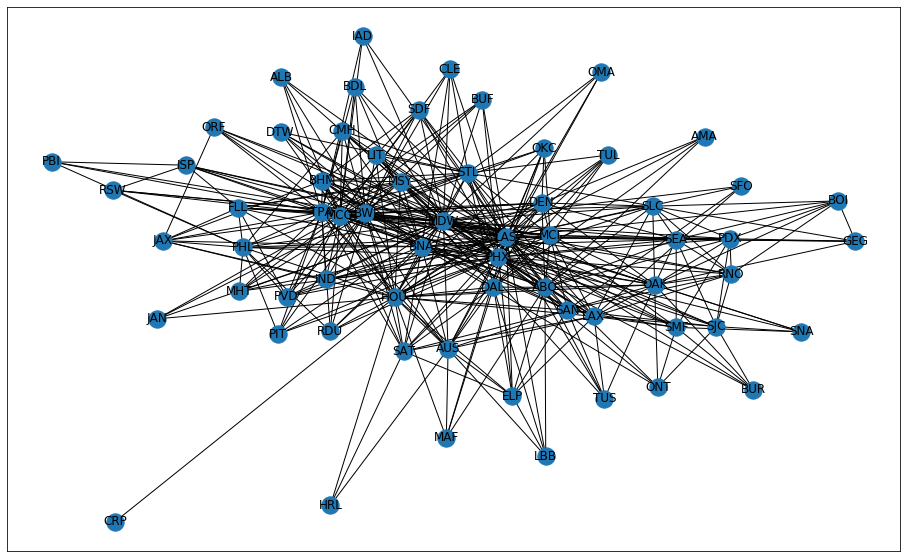

In [15]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure(figsize=(16,10))
nx.draw_networkx(df_net, with_labels=True)

The above amazing visualization represents the different flight routes. Suppose a passenger wants to take the shortest route from AMA to PBI. Graph theory comes to the rescue once again!

Let’s try to calculate the shortest path based on the airtime between the airports AMA and PBI. We will be using **Dijkstra’s shortest path algorithm.**

 

This algorithm finds the shortest path from a source vertex to all the vertices of the given graph. Let me give you a brief run through of the steps this algorithm follows:

1. Creates a sptSet (Shortest Path Tree Set) which keeps track of vertices included in the shortest path tree, i.e., minimum distance from the source vertex is calculated and finalized. 
2. Initially, this set is empty.
3. Assign a distance value to all vertices in the input graph. We assign a value of 0 to the source vertex and a value of INFINITE to all the remaining vertices.
4. Until the sptSet does not include all the vertices, we follow these sub-steps:
  - Pick a vertex which is not in the sptSet and is closest to the source vertex
  - Include that vertex in the sptSet
  - Update the distances of all adjacent vertices

**Let's implement this using networkX's inbuild function dijkstra_path**

In [18]:
shortest_path_distance = nx.dijkstra_path(df_net, source='AMA', target='PBI', weight='Distance')
shortest_path_distance

['AMA', 'DAL', 'MSY', 'TPA', 'PBI']

This is the shortest possible path between the two airports based on the distance between them. We can also calculate the shortest path based on the airtime just by changing the hyperparameter weight=’AirTime’:



In [20]:
shortest_path_airtime = nx.dijkstra_path(df_net, source='AMA', target='PBI', weight='AirTime')
shortest_path_airtime

['AMA', 'DAL', 'BHM', 'TPA', 'PBI']


This is the shortest path based on the airtime. Intuitive and easy to understand, this was all about graph theory!
